In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [19]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

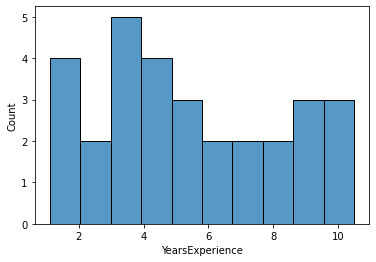

In [27]:
sns.histplot(df["YearsExperience"],kde=False,bins=10)

<AxesSubplot:xlabel='count', ylabel='YearsExperience'>

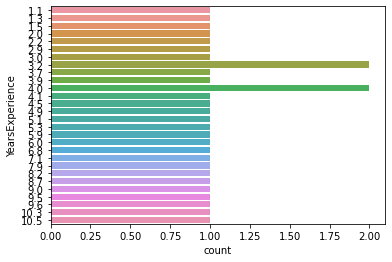

In [32]:
sns.countplot(y="YearsExperience",data=df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

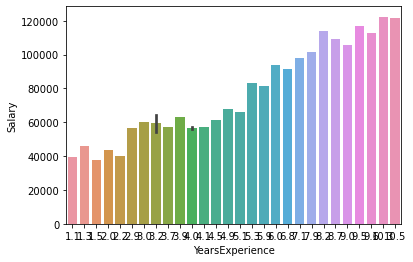

In [33]:
sns.barplot(x="YearsExperience",y="Salary",data=df)

<AxesSubplot:>

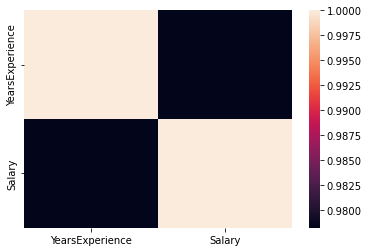

In [34]:
sns.heatmap(df.corr())

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [30]:
pred=lr.predict(X_test)

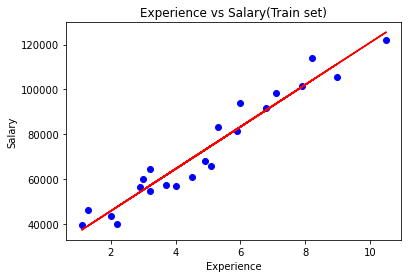

In [35]:
plt.scatter(X_train,Y_train,color="blue")
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary(Train set)")
plt.show()

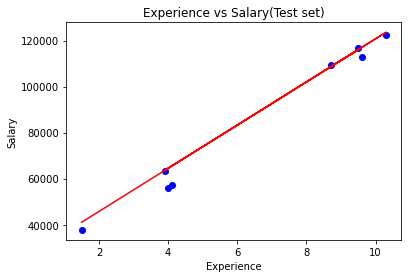

In [36]:
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,lr.predict(X_test),color="red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary(Test set)")
plt.show()

In [38]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(pred,Y_test))
print("MSE:",metrics.mean_squared_error(pred,Y_test))
print("RSMSE:",np.sqrt(metrics.mean_squared_error(pred,Y_test)))

MAE: 3508.5455930660555
MSE: 22407940.143340684
RSMSE: 4733.70258289858
